In [1]:
from torch.utils.data import DataLoader, Dataset, random_split
import torch
import torch.nn as nn
from torchvision.io import read_image
import torchvision.transforms as transforms
from torchvision import datasets
from torch import optim
import os
import torchvision
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import random
import cv2
import pandas as pd
import numpy as np

In [3]:
class CustomDataset(Dataset):
    def __init__(self, labels_file, imgs_dir, transform=None, target_transform=None):
        self.labels = pd.read_csv(labels_file)
        self.imgs_dir = imgs_dir
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        img_path = os.path.join(self.imgs_dir, self.labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.labels.iloc[idx, 1]
        #if self.transform:
        #    image = self.transform(image)
        #if self.target_transform:
        #    label = self.target_transform(label)
        return image, label

In [4]:
training_dataset = CustomDataset('data/Train/Train.csv', 'data/Train/')
validation_dataset = CustomDataset('data/Valid/Validation.csv', 'data/Valid/')

In [5]:
training_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [6]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [7]:
tst_img = validation_dataset.__getitem__(0)[0]

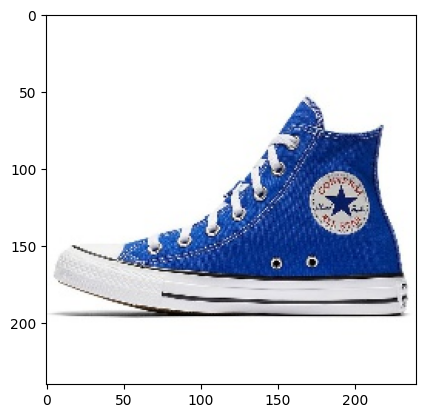

In [8]:
imshow(tst_img)

In [9]:
def extract_hog_features(image):
	# Calculate HOG features
	hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8),
	cells_per_block=(2, 2), visualize=False)
	return hog_features

In [13]:
def extract_features(dataset):
    X = []
    y = []
    for image, label in dataset:
        img_resized = cv2.resize(np.transpose(image.numpy(), (1, 2, 0)), (28, 28))
        # Convert image to grayscale
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        # Calculate HOG features
        hog_features = extract_hog_features(img_gray)
        
        X.append(hog_features)
        y.append(label)
    return np.array(X), np.array(y)

In [14]:
X, y = extract_features(training_dataset)

In [16]:
X.shape

(1569, 144)

In [40]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)


KNeighborsClassifier()

In [41]:
# Extract features from validation dataset  

X_val, y_val = extract_features(validation_dataset)


In [42]:
y_pred = knn.predict(X_val)
accuracy_score(y_val, y_pred)


0.7862595419847328

In [35]:
# SVM Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X, y)

y_svm_pred = svm.predict(X_val)
accuracy_score(y_val, y_svm_pred)


0.8753180661577609

In [36]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)


y_rf_pred = rf.predict(X_val)
accuracy_score(y_val, y_rf_pred)

0.8804071246819338

In [37]:
# Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X, y)

y_nb_pred = nb.predict(X_val)
accuracy_score(y_val, y_nb_pred)

0.821882951653944

In [38]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X, y)

y_dt_pred = dt.predict(X_val)
accuracy_score(y_val, y_dt_pred)

0.7684478371501272

In [39]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

y_lr_pred = lr.predict(X_val)
accuracy_score(y_val, y_lr_pred)


0.8600508905852418